<a href="https://colab.research.google.com/github/h-neal/ukpropertyprices/blob/main/Price_Paid_Dataset_(May_2024)_Ingesting_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. INGESTING HOUSING DATASET**

In [ ]:
# Scraping the data from Price Paid .GOV website: http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv

import pandas as pd
url = 'http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv'
housing_data = pd.read_csv(url)


In [ ]:
# Showing the first 3 lines of housing_data

housing_data.head(3)


,{31C68072-6709-FEE3-E063-4804A8C04F37},350000,2021-03-19 00:00,MK19 6GX,S,Y,F,4,Unnamed: 8,MANOR CLOSE,DEANSHANGER,MILTON KEYNES,WEST NORTHAMPTONSHIRE,WEST NORTHAMPTONSHIRE.1,A,A.1
0,{31C68072-671C-FEE3-E063-4804A8C04F37},302000,2021-09-30 00:00,NN8 6BQ,S,Y,F,70,NaN,BEAUMONT ROAD,NaN,WELLINGBOROUGH,NORTH NORTHAMPTONSHIRE,NORTH NORTHAMPTONSHIRE,A,A
1,{31C68072-6738-FEE3-E063-4804A8C04F37},155000,2021-10-11 00:00,NN2 6DA,F,Y,L,174,FLAT 9,ST ANDREWS ROAD,NaN,NORTHAMPTON,WEST NORTHAMPTONSHIRE,WEST NORTHAMPTONSHIRE,A,A
2,{31C68072-6746-FEE3-E063-4804A8C04F37},275000,2021-03-02 00:00,NN15 7FA,S,Y,F,49,NaN,FOSTER WAY,NaN,KETTERING,NORTH NORTHAMPTONSHIRE,NORTH NORTHAMPTONSHIRE,A,A


In [ ]:
# Adding the appropriate column labels to the dataset:

housing_data.columns = [
    "Transaction Unique ID",
    "Price",
    "Date of Transfer",
    "Post Code",
    "Property Type",
    "New Build? (Y/N)",
    "Duration",
    "Primary Addressable Object Name (PAON)",
    "Secondary Addressable Object Name (SAON)",
    "Street Name",
    "Locality",
    "Town/City",
    "District",
    "County",
    "PPD Category Type",                            # indicates the type of Price Paid transaction
                                                    # A = Standard Price Paid entry, includes single residential property sold for full market value
                                                    # B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals.

    "Record Status"                                 # indicates additions, changes and deletions to the records.
                                                    # A = Addition
                                                    # C = Change
                                                    # D = Delete
]
housing_data.head(3)

,Transaction Unique ID,Price,Date of Transfer,Post Code,Property Type,New Build? (Y/N),Duration,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Street Name,Locality,Town/City,District,County,PPD Category Type,Record Status
0,{31C68072-671C-FEE3-E063-4804A8C04F37},302000,2021-09-30 00:00,NN8 6BQ,S,Y,F,70,NaN,BEAUMONT ROAD,NaN,WELLINGBOROUGH,NORTH NORTHAMPTONSHIRE,NORTH NORTHAMPTONSHIRE,A,A
1,{31C68072-6738-FEE3-E063-4804A8C04F37},155000,2021-10-11 00:00,NN2 6DA,F,Y,L,174,FLAT 9,ST ANDREWS ROAD,NaN,NORTHAMPTON,WEST NORTHAMPTONSHIRE,WEST NORTHAMPTONSHIRE,A,A
2,{31C68072-6746-FEE3-E063-4804A8C04F37},275000,2021-03-02 00:00,NN15 7FA,S,Y,F,49,NaN,FOSTER WAY,NaN,KETTERING,NORTH NORTHAMPTONSHIRE,NORTH NORTHAMPTONSHIRE,A,A


In [ ]:
# Removing entries that did not occur in May 2024.

housing_data = housing_data[housing_data["Date of Transfer"].str.contains("2024-05")]


**2. CLEANING AND PREPARING HOUSING DATASET FOR DATA EXPLORATION**





2.1. Understanding the dataset

In [ ]:
# Counting the number of entries in the dataset

housing_data.shape[0]


2005

In [ ]:
# Producing a table that lists the data type type of each column

housing_data.dtypes


,0
Transaction Unique ID,object
Price,int64
Date of Transfer,object
Post Code,object
Property Type,object
New Build? (Y/N),object
Duration,object
Primary Addressable Object Name (PAON),object
Secondary Addressable Object Name (SAON),object
Street Name,object


In [ ]:
# Producing a table which lists the number of distinct values for each column

housing_data.nunique()


,0
Transaction Unique ID,2005
Price,981
Date of Transfer,24
Post Code,1614
Property Type,5
New Build? (Y/N),2
Duration,2
Primary Addressable Object Name (PAON),491
Secondary Addressable Object Name (SAON),254
Street Name,1523


2.2. Removing Duplicates

In [ ]:
# Confirming that the number of entries in the dataset is the same as the number of unique values for the column "Transaction Unique ID".

if housing_data.shape[0] == housing_data['Transaction Unique ID'].nunique():
  print("There are no duplicate transaction IDs in the dataset.")
else:
  print("There are duplicate transaction IDs in the dataset.")


There are no duplicate transaction IDs in the dataset.


In [ ]:
# Concatenating the columns "Post Code", "Primary Addressable Object Name (PAON)" and "Secondary Addressable Object Name (SAON)"

housing_data['Full Address'] = housing_data['Post Code'].astype(str) + " " + housing_data['Primary Addressable Object Name (PAON)'].astype(str) + " " + housing_data['Secondary Addressable Object Name (SAON)'].astype(str)


In [ ]:
# Concatenating the columns "Street Name", "Primary Addressable Object Name (PAON)" and "Secondary Addressable Object Name (SAON)"

housing_data['Full Address 2'] = housing_data['Street Name'].astype(str) + " " + housing_data['Primary Addressable Object Name (PAON)'].astype(str) + " " + housing_data['Secondary Addressable Object Name (SAON)'].astype(str)


In [ ]:
# Producing a table where the counts of the values of the "Full Address" or "Full Address 2" is greater than 1

# Finding the counts of the values of the "Full Address" or "Full Address 2"
address_counts = housing_data['Full Address'].value_counts()
address_counts_2 = housing_data['Full Address 2'].value_counts()

# Filtering the counts to show only those greater than 1
duplicate_addresses = address_counts[address_counts > 1]
duplicate_addresses_2 = address_counts_2[address_counts_2 > 1]

# Displaying the results
print("Duplicate Addresses (Full Address):")
print(duplicate_addresses)

print("\nDuplicate Addresses (Full Address 2):")
print(duplicate_addresses_2)


Duplicate Addresses (Full Address):
Full Address
CW11 3JU 5 nan                                    3
WN8 0EW 40 nan                                    3
FY1 2PW 19 nan                                    2
HD3 3FJ SPRING HEAD FARM, 988 3                   2
HD9 1LY 16 nan                                    2
EX1 2DS 56C nan                                   2
BD1 1JB LANDMARK HOUSE, 11 APARTMENT 318          2
DE74 2NS 21 nan                                   2
PO38 1NH 2 nan                                    2
S6 5DB 200 nan                                    2
DL14 7EG 44 nan                                   2
CF63 2PJ 35 nan                                   2
TN25 7AB 33 nan                                   2
CO12 3LP THE OLD SCHOOL APARTMENTS, 56 FLAT 32    2
OX7 3LU LANGSTON HOUSE nan                        2
SE8 4AW 8 nan                                     2
EC1V 2AP VALENCIA TOWER, 3 APARTMENT 1            2
BS23 2QZ 3 nan                                    2
B77 2NJ 12 nan 

In [ ]:
# Producing a count of the entries in the tables above

print(len(duplicate_addresses))
print(len(duplicate_addresses_2))

25
25


In [ ]:
# Removing all entries in duplicate_addresses_1 or duplicate_addresses_2 from the dataset

# Create a boolean mask for rows with duplicate addresses
duplicate_mask = housing_data['Full Address'].isin(duplicate_addresses.index) | housing_data['Full Address 2'].isin(duplicate_addresses_2.index)

# Remove rows with duplicate addresses
housing_data = housing_data[~duplicate_mask]


In [ ]:
# Counting the number of entries in the dataset

housing_data.shape[0]

1953

In [ ]:
# Counting the number of entries where the value of the column "Record Status" is "C" or "D"

count_C_D = housing_data[housing_data["Record Status"].isin(["C", "D"])].shape[0]
print(count_C_D)


69


In [ ]:
# Removing all entries where the value of the column "Record Status" is "C" or "D"

housing_data = housing_data[~housing_data["Record Status"].isin(["C", "D"])]


In [ ]:
# Counting the number of entries in the dataset

housing_data.shape[0]

1884

2.3. Handling Missing Values

In [ ]:
# Producing a table which lists the number of missing values in each column.

housing_data.isna().sum()

,0
Transaction Unique ID,0
Price,0
Date of Transfer,0
Post Code,8
Property Type,0
New Build? (Y/N),0
Duration,0
Primary Addressable Object Name (PAON),0
Secondary Addressable Object Name (SAON),1520
Street Name,22


In [ ]:
# Producing a table which lists the number of missing values in each column.

housing_data.isna().sum()


,0
Transaction Unique ID,0
Price,0
Date of Transfer,0
Post Code,8
Property Type,0
New Build? (Y/N),0
Duration,0
Primary Addressable Object Name (PAON),0
Secondary Addressable Object Name (SAON),1520
Street Name,22


In [ ]:
# Producing a table which lists the percentage of missing data in each column.

housing_data.isna().sum() * 100 / len(housing_data)


,0
Transaction Unique ID,0.000000
Price,0.000000
Date of Transfer,0.000000
Post Code,0.424628
Property Type,0.000000
New Build? (Y/N),0.000000
Duration,0.000000
Primary Addressable Object Name (PAON),0.000000
Secondary Addressable Object Name (SAON),80.679406
Street Name,1.167728


In [ ]:
# Producing a table which lists the number of entries for each Property Type where the Secondary Addressable Object Name (SAON) value is missing

housing_data[housing_data['Secondary Addressable Object Name (SAON)'].isna()]['Property Type'].value_counts()


,count
Property Type,
S,511
D,482
T,316
O,110
F,101


In [ ]:
# Retrieving the number of entries where the Post Code and the Street Name are missing values.

housing_data[(housing_data['Post Code'].isna()) & (housing_data['Street Name'].isna())].shape[0]


0

In [ ]:
# Removing the column "Record Status"

housing_data = housing_data.drop(columns=['Record Status'])


In [ ]:
# Removing the column "Locality"

housing_data = housing_data.drop(columns=['Locality'])


In [ ]:
# Removing the column "Street Name".

housing_data = housing_data.drop(columns=['Street Name'])


In [ ]:
# Removing any entries where the Post Code is a missing value.

housing_data = housing_data.dropna(subset=['Post Code'])


In [ ]:
# Producing a table which lists the number of missing values in each column to confirm that there are no missing values.

if housing_data.isna().sum().sum() == 0:
  print("There are no longer any missing values in the dataset.")
else:
  print("There are still missing values in the dataset.")
housing_data.isna().sum()


There are still missing values in the dataset.


,0
Transaction Unique ID,0
Price,0
Date of Transfer,0
Post Code,0
Property Type,0
New Build? (Y/N),0
Duration,0
Primary Addressable Object Name (PAON),0
Secondary Addressable Object Name (SAON),1514
Town/City,0


2.4. Correct Data Types

In [ ]:
# Converting the column labelled data type of "Date of Transfer" to datetime.

housing_data['Date of Transfer'] = pd.to_datetime(housing_data['Date of Transfer'])


In [ ]:
# Converting the data type of the columns labelled "Property Type", "New Build? (Y/N)", "Duration", "PPD Category Type" and "Property Type" to categorical

housing_data['Property Type'] = pd.Categorical(housing_data['Property Type'])
housing_data['New Build? (Y/N)'] = pd.Categorical(housing_data['New Build? (Y/N)'])
housing_data['Duration'] = pd.Categorical(housing_data['Duration'])
housing_data['PPD Category Type'] = pd.Categorical(housing_data['PPD Category Type'])


In [ ]:
# Converting the data type of the columns labelled "Post Code", "Town/City", "District" and "County" to categorical

housing_data['Post Code'] = pd.Categorical(housing_data['Post Code'])
housing_data['Town/City'] = pd.Categorical(housing_data['Town/City'])
housing_data['District'] = pd.Categorical(housing_data['District'])
housing_data['County'] = pd.Categorical(housing_data['County'])


In [ ]:
# Converting the data type of the column labelled "Price" to integer

housing_data['Price'] = housing_data['Price'].astype(int)


In [ ]:
# Producing a table which lists the data type of each column

housing_data.dtypes

,0
Transaction Unique ID,object
Price,int64
Date of Transfer,datetime64[ns]
Post Code,category
Property Type,category
New Build? (Y/N),category
Duration,category
Primary Addressable Object Name (PAON),object
Secondary Addressable Object Name (SAON),object
Town/City,category


2.5 Standardising Text Fields

In [ ]:
# Reformatting the text in the columns "Town/City", "District", and "County" by converting all to lowercase text and removing leading/trailing spaces.

text_columns = ["Town/City", "District", "County"]
for col in text_columns:
  housing_data[col] = housing_data[col].str.lower().str.strip()


In [ ]:
# Producing a table that lists the number of unique values in the columns "Town/City", "District", and "County"

housing_data[["Town/City", "District", "County"]].nunique()


,0
Town/City,492
District,299
County,107


2.6. Outliers

In [ ]:
# Producing a table which lists the minimum, maximum, mean, median, mode and range of the column "Price".
price_stats = {
    'Minimum': housing_data['Price'].min(),
    'Maximum': housing_data['Price'].max(),
    'Mean': housing_data['Price'].mean(),
    'Median': housing_data['Price'].median(),
    'Mode': housing_data['Price'].mode()[0],
    'Range': housing_data['Price'].max() - housing_data['Price'].min()
}
print(price_stats)


{'Minimum': 100, 'Maximum': 23000000, 'Mean': np.float64(382395.2025586354), 'Median': 295000.0, 'Mode': np.int64(300000), 'Range': 22999900}


In [ ]:
# Detecting the number of outliers in the column "Price" using the Interquartile range

import numpy as np

# Calculating the first and third quartiles (Q1 and Q3)
Q1 = housing_data['Price'].quantile(0.25)
Q3 = housing_data['Price'].quantile(0.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_iqr = housing_data[(housing_data['Price'] < lower_bound) | (housing_data['Price'] > upper_bound)]

# Counting the number of outliers
num_outliers_iqr = outliers_iqr.shape[0]

print("Number of outliers in 'Price':", num_outliers_iqr)

Number of outliers in 'Price': 114


In [ ]:
# Calculating the number of outliers below the lower bound

lower_bound_outliers = housing_data[housing_data['Price'] < lower_bound]
num_lower_bound_outliers = lower_bound_outliers.shape[0]

print("Number of outliers below the lower bound:", num_lower_bound_outliers)


Number of outliers below the lower bound: 0


In [ ]:
print(lower_bound)

-112440.625


In [ ]:
# Detecting the number of outliers in the column "Price" using the Z-score

# Calculating the mean and standard deviation of the 'Price' column
mean = housing_data['Price'].mean()
std_dev = housing_data['Price'].std()

# Calculating the Z-score for each price value
housing_data['Price_Zscore'] = (housing_data['Price'] - mean) / std_dev

# Defining a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identifying outliers based on Z-score
outliers_zscore = housing_data[(housing_data['Price_Zscore'] > threshold) | (housing_data['Price_Zscore'] < -threshold)]

# Counting the number of outliers
num_outliers_zscore = outliers_zscore.shape[0]

print("Number of outliers in 'Price' using Z-score:", num_outliers_zscore)


Number of outliers in 'Price' using Z-score: 9


In [ ]:
# Printing the number of outliers in the column "Price" below the threshold Z-score of -3

# Calculating the number of outliers below the threshold Z-score of -3
below_threshold_outliers = housing_data[housing_data['Price_Zscore'] < -3]
num_below_threshold_outliers = below_threshold_outliers.shape[0]

print("Number of outliers below the threshold Z-score of -3:", num_below_threshold_outliers)


Number of outliers below the threshold Z-score of -3: 0


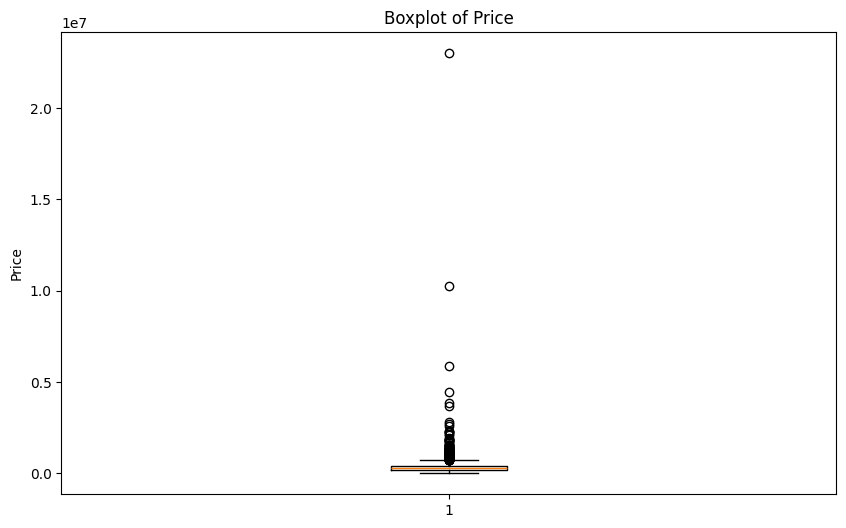

In [ ]:
# Plotting a boxplot of the column "Price"

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.boxplot(housing_data['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()


In [ ]:
# Producing a table which provides the count of values for "Price" between different thresholds

import pandas as pd
# Create bins for the price ranges
bins = [0, 100, 1000, 10000, 100000, 1000000]

# Cut the 'Price' column into the bins
housing_data['Price_Range'] = pd.cut(housing_data['Price'], bins=bins, labels=['0-100', '100-1000', '1000-10000', '10000-100000', '100000-1000000'])

# Count the values in each price range
price_range_counts = housing_data['Price_Range'].value_counts().sort_index()

# Display the table
print(price_range_counts)


Price_Range
0-100                1
100-1000             1
1000-10000           4
10000-100000       103
100000-1000000    1705
Name: count, dtype: int64


In [ ]:
# Producing a table of entries where the column "Price" is between 100 and 10000

# Filter the DataFrame for prices between 100 and 10000
price_range_100_10000 = housing_data[(housing_data['Price'] >= 100) & (housing_data['Price'] <= 10000)]

# Display the filtered table
price_range_100_10000.head()


,Transaction Unique ID,Price,Date of Transfer,Post Code,Property Type,New Build? (Y/N),Duration,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Town/City,District,County,PPD Category Type,Full Address,Full Address 2,Price_Zscore,Price_Range
27121,{31C68073-1308-FEE3-E063-4804A8C04F37},3750,2024-05-03,HD4 7JJ,O,N,F,170,NaN,huddersfield,kirklees,west yorkshire,B,HD4 7JJ 170 nan,MOOR LANE 170 nan,-0.571285,1000-10000
27123,{31C68073-130A-FEE3-E063-4804A8C04F37},500,2024-05-03,HD5 0LH,O,N,F,65,NaN,huddersfield,kirklees,west yorkshire,B,HD5 0LH 65 nan,HEATON MOOR ROAD 65 nan,-0.576189,100-1000
30465,{31C68073-076D-FEE3-E063-4804A8C04F37},100,2024-05-24,RH5 6SP,O,N,F,ST. BARNABAS OLD SCHOOL,NaN,dorking,mole valley,surrey,B,RH5 6SP ST. BARNABAS OLD SCHOOL nan,RANMORE COMMON ROAD ST. BARNABAS OLD SCHOOL nan,-0.576792,0-100
30640,{31C68073-0FD2-FEE3-E063-4804A8C04F37},6000,2024-05-28,BN11 3SB,O,N,F,7,NaN,worthing,worthing,west sussex,B,BN11 3SB 7 nan,CAVENDISH MEWS 7 nan,-0.567890,1000-10000
31424,{31C68073-102C-FEE3-E063-4804A8C04F37},2000,2024-05-16,PO21 2UP,O,N,F,238,NaN,bognor regis,arun,west sussex,B,PO21 2UP 238 nan,HAWTHORN ROAD 238 nan,-0.573925,1000-10000


In [ ]:
# Counting the number of entries which have a value of "O" in the column "Property Type" and a value of "B" in the column "PPD Category Type"

count_O_B = housing_data[(housing_data['Property Type'] == 'O') & (housing_data['PPD Category Type'] == 'B')].shape[0]
print(count_O_B)


117


In [ ]:
# Counting the number of entries which have a value of "B" in the column "PPD Category Type"

count_B = housing_data[housing_data['PPD Category Type'] == 'B'].shape[0]
print(count_B)


496


In [ ]:
# Producing a table which shows the count of all the values in the column "Property Type" which have a value of "B" in the column "PPD Category Type"

# Filter the DataFrame for entries with "PPD Category Type" equal to "B"
filtered_data = housing_data[housing_data['PPD Category Type'] == 'B']

# Count the values in the "Property Type" column for the filtered data
property_type_counts = filtered_data['Property Type'].value_counts()

# Display the table
print(property_type_counts)


Property Type
F    156
O    117
S    102
T     88
D     33
Name: count, dtype: int64


In [ ]:
# Removing any entries where the value in the column "PPD Category Type" is equal to "B"
# This refers to Additional Price Paid entry which include transfers under a power of sale/repossessions,
# buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales
# where the property type is classed as ‘Other’. Deemed unnecessary for analysis.

housing_data = housing_data[housing_data['PPD Category Type'] != 'B']


In [ ]:
# Removing the column labelled "PPD Category Type"

housing_data = housing_data.drop(columns=['PPD Category Type'])


In [ ]:
# Counting the number of entries in the dataset

housing_data.shape[0]


1380

In [ ]:
# Producing a table which provides the count of values for "Price" between different thresholds

import pandas as pd
# Create bins for the price ranges
bins = [0, 100, 1000, 10000, 100000, 1000000]

# Cut the 'Price' column into the bins
housing_data['Price_Range'] = pd.cut(housing_data['Price'], bins=bins, labels=['0-100', '100-1000', '1000-10000', '10000-100000', '100000-1000000'])

# Count the values in each price range
price_range_counts = housing_data['Price_Range'].value_counts().sort_index()

# Display the table
print(price_range_counts)

Price_Range
0-100                0
100-1000             0
1000-10000           0
10000-100000        36
100000-1000000    1314
Name: count, dtype: int64


In [ ]:
# Detecting the number of outliers in the column "Price" using the Interquartile range for the new dataset

import numpy as np

# Calculating the first and third quartiles (Q1 and Q3)
Q1 = housing_data['Price'].quantile(0.25)
Q3 = housing_data['Price'].quantile(0.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_iqr = housing_data[(housing_data['Price'] < lower_bound) | (housing_data['Price'] > upper_bound)]

# Counting the number of outliers
num_outliers_iqr = outliers_iqr.shape[0]

print("Number of outliers in 'Price':", num_outliers_iqr)

Number of outliers in 'Price': 74


In [ ]:
# Calculating the number of outliers below the lower bound in the new dataset

lower_bound_outliers = housing_data[housing_data['Price'] < lower_bound]
num_lower_bound_outliers = lower_bound_outliers.shape[0]

print("Number of outliers below the lower bound:", num_lower_bound_outliers)


Number of outliers below the lower bound: 0


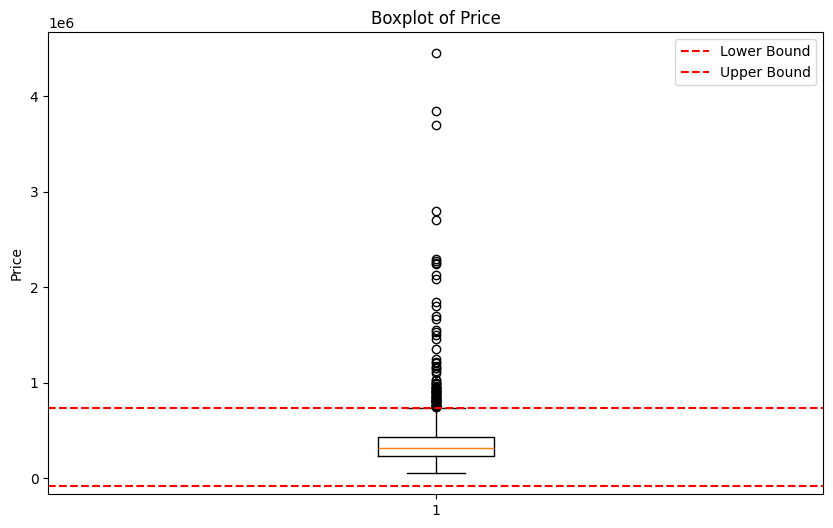

In [ ]:
# Plotting a boxplot of the column "Price" with lines to indicate the upper and lower bounds

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.boxplot(housing_data['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()


In [ ]:
# Detecting the number of outliers in the column "Price" using the Z-score for the new dataset

# Calculating the mean and standard deviation of the 'Price' column
mean = housing_data['Price'].mean()
std_dev = housing_data['Price'].std()

# Calculating the Z-score for each price value
housing_data['Price_Zscore'] = (housing_data['Price'] - mean) / std_dev

# Defining a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identifying outliers based on Z-score
outliers_zscore = housing_data[(housing_data['Price_Zscore'] > threshold) | (housing_data['Price_Zscore'] < -threshold)]

# Counting the number of outliers
num_outliers_zscore = outliers_zscore.shape[0]

print("Number of outliers in 'Price' using Z-score:", num_outliers_zscore)

Number of outliers in 'Price' using Z-score: 20


In [ ]:
# Printing the number of outliers in the column "Price" below the threshold Z-score of -3

# Calculating the number of outliers below the threshold Z-score of -3
below_threshold_outliers = housing_data[housing_data['Price_Zscore'] < -3]
num_below_threshold_outliers = below_threshold_outliers.shape[0]

print("Number of outliers below the threshold Z-score of -3:", num_below_threshold_outliers)

Number of outliers below the threshold Z-score of -3: 0


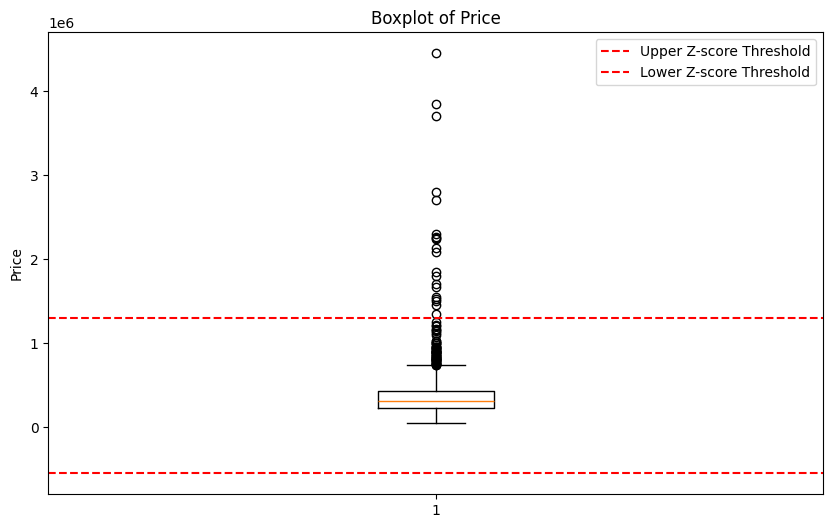

In [ ]:
# Plotting a boxplot of the column "Price" with lines to indicate the threshold z-scores

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.boxplot(housing_data['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.axhline(y=mean + threshold * std_dev, color='r', linestyle='--', label='Upper Z-score Threshold')
plt.axhline(y=mean - threshold * std_dev, color='r', linestyle='--', label='Lower Z-score Threshold')
plt.legend()
plt.show()


In [ ]:
# Creating a new column which segments the entries based on their price:
# Entries where price is below IQR upper bound: Regular
# Entries where price is above IQR upper bound but below z-score upper threshold: High-End
# Entries where price is above z-score upper threshold: Luxury

# Calculating IQR upper bound
Q1 = housing_data['Price'].quantile(0.25)
Q3 = housing_data['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound_iqr = Q3 + 1.5 * IQR

# Calculating Z-score upper threshold
mean = housing_data['Price'].mean()
std_dev = housing_data['Price'].std()
threshold = 3
upper_bound_zscore = mean + threshold * std_dev

# Create the new column
def price_segment(price):
  if price <= upper_bound_iqr:
    return 'Regular'
  elif price <= upper_bound_zscore:
    return 'High-End'
  else:
    return 'Luxury'

housing_data['Price_Segment'] = housing_data['Price'].apply(price_segment)


<Figure size 1000x600 with 0 Axes>

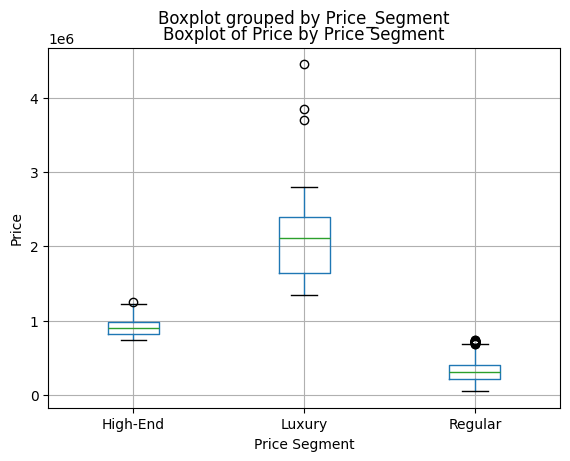

In [ ]:
# Plotting a boxplot of the column "Price" for each value in "Price Segment"

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
housing_data.boxplot(column='Price', by='Price_Segment')
plt.title('Boxplot of Price by Price Segment')
plt.ylabel('Price')
plt.xlabel('Price Segment')
plt.show()

In [ ]:
# Removing the entries where the value of the column "Price" is in the top 2

# Sort the DataFrame by 'Price' in descending order
housing_data_sorted = housing_data.sort_values('Price', ascending=False)

# Get the indices of the top 2 entries
top_2_indices = housing_data_sorted.index[:2]

# Remove the top 5 entries from the DataFrame
housing_data = housing_data.drop(top_2_indices)


<Figure size 1000x600 with 0 Axes>

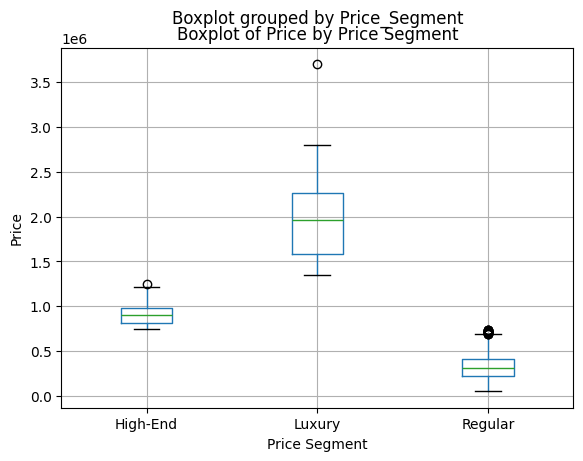

In [ ]:
# Plotting a boxplot of the column "Price" for each value in "Price Segment"

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
housing_data.boxplot(column='Price', by='Price_Segment')
plt.title('Boxplot of Price by Price Segment')
plt.ylabel('Price')
plt.xlabel('Price Segment')
plt.show()

In [ ]:
# Produce a table which counts the number of entries in unique values for "Price Segment"

# Count the number of entries in unique values for "Price Segment"
price_segment_counts = housing_data['Price_Segment'].value_counts()

# Display the table
print(price_segment_counts)


Price_Segment
Regular     1306
High-End      54
Luxury        18
Name: count, dtype: int64


2.7 Transforming Features

In [ ]:
#Importing the geospatial dataset from Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Use pd.read_pickle() to read the pickle file
df_geospatial_data = pd.read_pickle('/content/drive/MyDrive/Housing Prices Project/Geospatial Data/clean_geospatial_data.pkl')

Mounted at /content/drive


In [ ]:
# Merging the housing_data dataset on the column lablled "Post Code" with the df_geospatial_data dataset on the column "postcode"

housing_data = housing_data.merge(df_geospatial_data, left_on='Post Code', right_on='Post Code', how='left')


In [ ]:

# Showing the first 5 entries in the merged dataset

housing_data.head()


,Transaction Unique ID,Price,Date of Transfer,Post Code,Property Type,New Build? (Y/N),Duration,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Town/City,...,County,Full Address,Full Address 2,Price_Zscore,Price_Range,Price_Segment,latitude,longitude,Post Code Area,Region
0,{31C68072-8A00-FEE3-E063-4804A8C04F37},432000,2024-05-30,IP11 9GG,D,Y,F,2,NaN,felixstowe,...,suffolk,IP11 9GG 2 nan,IRIS ROAD 2 nan,0.178280,100000-1000000,Regular,51.976697,1.334113,IP,East of England
1,{31C68072-8A01-FEE3-E063-4804A8C04F37},257000,2024-05-30,IP11 9GS,S,Y,F,4,NaN,felixstowe,...,suffolk,IP11 9GS 4 nan,OSPREY CLOSE 4 nan,-0.390709,100000-1000000,Regular,NaN,NaN,NaN,NaN
2,{31C68072-8A03-FEE3-E063-4804A8C04F37},320000,2024-05-23,IP21 5EZ,S,Y,F,8,NaN,eye,...,suffolk,IP21 5EZ 8 nan,COOPER GARDENS 8 nan,-0.185873,100000-1000000,Regular,52.315320,1.265162,IP,East of England
3,{31C68072-8A06-FEE3-E063-4804A8C04F37},407495,2024-05-16,IP8 4FL,D,Y,F,4,NaN,ipswich,...,suffolk,IP8 4FL 4 nan,BADGER GROVE 4 nan,0.098605,100000-1000000,Regular,52.084663,1.092907,IP,East of England
4,{31C68072-8A07-FEE3-E063-4804A8C04F37},284995,2024-05-22,CB9 9FH,S,Y,F,17,NaN,haverhill,...,suffolk,CB9 9FH 17 nan,LANCELOTT ROAD 17 nan,-0.299687,100000-1000000,Regular,NaN,NaN,NaN,NaN


In [ ]:
# Counting the number of missing values in the columns "latitude" and "longitude"

missing_latitude = housing_data['latitude'].isna().sum()
missing_longitude = housing_data['longitude'].isna().sum()

print(f"Missing values in 'latitude': {missing_latitude}")
print(f"Missing values in 'longitude': {missing_longitude}")


Missing values in 'latitude': 339
Missing values in 'longitude': 339


In [ ]:
# Producing a table of the entries where the values in the columns lablled "longitude" and "latitude" are missing

# Filtering the DataFrame for missing values in 'longitude' and 'latitude'
missing_geo_data = housing_data[housing_data['longitude'].isna() | housing_data['latitude'].isna()]

# Display the filtered table
missing_geo_data.head(8)


,Transaction Unique ID,Price,Date of Transfer,Post Code,Property Type,New Build? (Y/N),Duration,Primary Addressable Object Name (PAON),Secondary Addressable Object Name (SAON),Town/City,...,County,Full Address,Full Address 2,Price_Zscore,Price_Range,Price_Segment,latitude,longitude,Post Code Area,Region
1,{31C68072-8A01-FEE3-E063-4804A8C04F37},257000,2024-05-30,IP11 9GS,S,Y,F,4,NaN,felixstowe,...,suffolk,IP11 9GS 4 nan,OSPREY CLOSE 4 nan,-0.390709,100000-1000000,Regular,NaN,NaN,NaN,NaN
4,{31C68072-8A07-FEE3-E063-4804A8C04F37},284995,2024-05-22,CB9 9FH,S,Y,F,17,NaN,haverhill,...,suffolk,CB9 9FH 17 nan,LANCELOTT ROAD 17 nan,-0.299687,100000-1000000,Regular,NaN,NaN,NaN,NaN
5,{31C68072-8A08-FEE3-E063-4804A8C04F37},280000,2024-05-31,CB9 9FL,T,Y,F,2,NaN,haverhill,...,suffolk,CB9 9FL 2 nan,SUMPTER DRIVE 2 nan,-0.315928,100000-1000000,Regular,NaN,NaN,NaN,NaN
6,{31C68072-8A0A-FEE3-E063-4804A8C04F37},255000,2024-05-28,IP11 9GS,S,Y,F,6,NaN,felixstowe,...,suffolk,IP11 9GS 6 nan,OSPREY CLOSE 6 nan,-0.397212,100000-1000000,Regular,NaN,NaN,NaN,NaN
11,{31C68072-3AF3-FEE3-E063-4804A8C04F37},202950,2024-05-31,FY6 9FL,T,Y,F,16,NaN,poulton-le-fylde,...,lancashire,FY6 9FL 16 nan,BLACKTHORN PLACE 16 nan,-0.566446,100000-1000000,Regular,NaN,NaN,NaN,NaN
14,{31C68072-464A-FEE3-E063-4804A8C04F37},232495,2024-05-31,LE10 2FT,S,Y,F,14,NaN,hinckley,...,leicestershire,LE10 2FT 14 nan,BURGESS CLOSE 14 nan,-0.470384,100000-1000000,Regular,NaN,NaN,NaN,NaN
18,{31C68072-4B2F-FEE3-E063-4804A8C04F37},356203,2024-05-17,M15 4ZQ,F,Y,L,11,FLAT 1608,manchester,...,greater manchester,M15 4ZQ 11 FLAT 1608,SILVERCROFT STREET 11 FLAT 1608,-0.068164,100000-1000000,Regular,NaN,NaN,NaN,NaN
19,{31C68072-4B30-FEE3-E063-4804A8C04F37},406963,2024-05-20,M15 4ZT,F,Y,L,11,FLAT 3808,manchester,...,greater manchester,M15 4ZT 11 FLAT 3808,SILVERCROFT STREET 11 FLAT 3808,0.096875,100000-1000000,Regular,NaN,NaN,NaN,NaN


In [ ]:
# Removing the entries where the values in the columns lablled "longitude" and "latitude" are missing

# Filter the DataFrame to remove rows with missing values in 'longitude' or 'latitude'
housing_data = housing_data.dropna(subset=['longitude', 'latitude'])


In [ ]:
# Counting the number of entries in the dataset

housing_data.shape[0]


1039

2.8 Validating Data Integrity

In [ ]:
# Checking if any values in the "Price" column are not positive
negative_prices = housing_data[housing_data['Price'] <= 0]

# Print the number of negative or zero price values
print("Number of non-positive price values:", len(negative_prices))

Number of non-positive price values: 0


In [ ]:
# Checking that the column labelled "Postcode" follows the correct UK format

import re

# Define a regular expression for UK postcode format
postcode_pattern = r"^[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][ABD-HJLNP-UW-Z]{2}$"

# Check if Postcode values match the pattern
valid_postcodes = housing_data['Post Code'].str.match(postcode_pattern, na=False)

# Find invalid postcodes
invalid_postcodes = housing_data[~valid_postcodes]['Post Code']

# Print the number of invalid postcodes
print("Number of invalid postcodes:", len(invalid_postcodes))

# Print the invalid postcodes (optional)
print("Invalid postcodes:\n", invalid_postcodes)


Number of invalid postcodes: 0
Invalid postcodes:
 Series([], Name: Post Code, dtype: object)


2.9 Final Dataset Review

In [ ]:
# Checking for missing values

# Producing a table which lists the number of missing values in each column to confirm that there are no missing values.

if housing_data.isna().sum().sum() == 0:
  print("There are no missing values in the dataset.")
else:
  print("There are still missing values in the dataset.")
housing_data.isna().sum()


There are still missing values in the dataset.


,0
Transaction Unique ID,0
Price,0
Date of Transfer,0
Post Code,0
Property Type,0
New Build? (Y/N),0
Duration,0
Primary Addressable Object Name (PAON),0
Secondary Addressable Object Name (SAON),885
Town/City,0


In [ ]:
# Removing the column labelled "Price Range"

housing_data = housing_data.drop(columns=['Price_Range'])


In [ ]:
# Removing the column labelled "Price_Zscore"

housing_data = housing_data.drop(columns=['Price_Zscore'])


In [ ]:
# Removing the column labelled "Full Address"

housing_data = housing_data.drop(columns=['Full Address'])


In [ ]:
# Removing the column labelled "Full Address 2"

housing_data = housing_data.drop(columns=['Full Address 2'])


In [ ]:
# Checking for missing values

# Producing a table which lists the number of missing values in each column to confirm that there are no missing values.

if housing_data.isna().sum().sum() == 0:
  print("There are no missing values in the dataset.")
else:
  print("There are still missing values in the dataset.")
housing_data.isna().sum()

There are still missing values in the dataset.


,0
Transaction Unique ID,0
Price,0
Date of Transfer,0
Post Code,0
Property Type,0
New Build? (Y/N),0
Duration,0
Primary Addressable Object Name (PAON),0
Secondary Addressable Object Name (SAON),885
Town/City,0


In [ ]:
# Producing a table which lists the data type of each column

housing_data.dtypes


,0
Transaction Unique ID,object
Price,int64
Date of Transfer,datetime64[ns]
Post Code,object
Property Type,category
New Build? (Y/N),category
Duration,category
Primary Addressable Object Name (PAON),object
Secondary Addressable Object Name (SAON),object
Town/City,object


**3. CREATING A CLEANED DATASET**

In [ ]:
# Exporting the dataset as a .csv file

housing_data.to_csv('/content/drive/MyDrive/Housing Prices Project/May 2024/cleaned_housing_data_may_2024.csv', index=False)


In [ ]:
# Exporting the dataset as a pickle file to the file directory /content/drive/MyDrive/Housing Prices Project/May 2024/ Replacing any dataset with the same file name.

housing_data.to_pickle('/content/drive/MyDrive/Housing Prices Project/May 2024/cleaned_housing_data_may_2024.pkl')
